In [47]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# directory paths
train_dir = "./data/train/"
test_dir = "./data/test/"

# load data to dataframe with file names and labels
def load_to_df(file_path):
	file_names = []
	labels = []
	folders = os.listdir(file_path)
	for folder in folders:
		folder_path = file_path + folder
		files = os.listdir(file_path + folder)
		for file in files:
			file_names.append(file)
			labels.append(folder)

	df = pd.DataFrame({"file_name": file_names, "label": labels})
	return df

# load data to dataframes
train_df = load_to_df(train_dir)
test_df = load_to_df(test_dir)

In [ ]:
# setup for the dataset
class BrainTumorDataset(Dataset):
	def __init__(self, df, file_path, transform=None):
		self.df = df
		self.file_path = file_path
		self.transform = transform

	def __len__(self):
		return len(self.df)

	def __getitem__(self, idx):
		file_name = self.df.iloc[idx, 0]
		label = self.df.iloc[idx, 1]
		img = Image.open(self.file_path + label + "/" + file_name)
		
		img = img.convert("RGB") # convert to RGB

		if self.transform:
			img = self.transform(img)

		return img, label

# transform the images to ensure equal size and tensors
transform = transforms.Compose([
	transforms.Resize((512, 512)),
	transforms.ToTensor()
])

train_dataset = BrainTumorDataset(train_df, train_dir, transform=transform)
test_dataset = BrainTumorDataset(test_df, test_dir, transform=transform)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

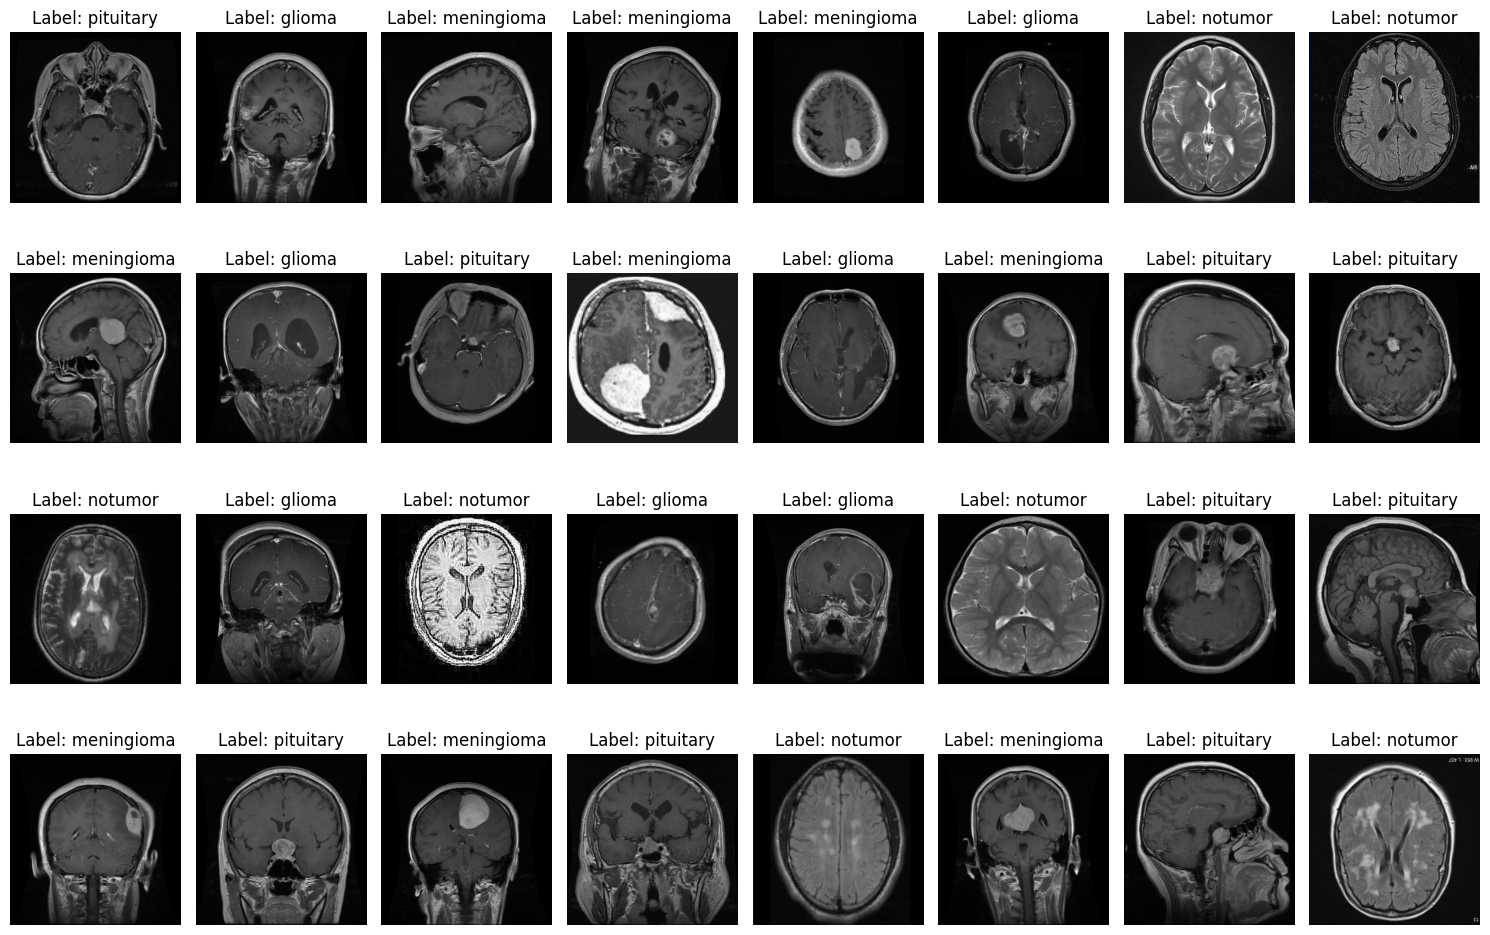

In [ ]:
# Function to show a grid of images from a single batch
def show_image_grid(images, labels, rows=4, cols=8):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()
    
    # Display each image in the batch
    for i in range(len(images)):
        img = images[i].numpy().transpose((1, 2, 0))  # Convert to HWC format for plotting
        img = np.clip(img, 0, 1)  # Ensure valid display range
        axes[i].imshow(img)
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis("off")  # Hide axes

    # Hide any extra subplots in case there are fewer images than grid cells
    for j in range(len(images), len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Display the images in a grid from one batch in the DataLoader
for imgs, labels in train_loader:
    show_image_grid(imgs, labels)
    break  